In [1]:
#  1. Information Retrieval
#  2. Information Extraction
#  3. Information clustering & Pattern Identification
#  4. Knowledge Management

In [2]:
# Important Libraries
import numpy as np 
import pandas as pd 

import os


import regex as re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# load text
filename = 'Sample_B.txt'
file = open(filename, 'rt')
myfile = file.read()
file.close()

In [4]:
#Removing whitespaces ( _ , \n , \t , ~ )

myfile=(myfile.replace("_", " "))
myfile=(myfile.replace("\t", " "))
myfile=(myfile.replace("\n", " "))
myfile=(myfile.replace("~", " "))
myfile=(myfile.replace(".", " "))
myfile=(myfile.replace(":", " "))

myfile=(myfile.replace("-", " "))
myfile=(myfile.replace(",", " "))

#removing repetative ONGC LOGO
myfile=(myfile.replace("OIL AND NATURAL GAS CORPORATION LTD", " "))
myfile=(myfile.replace("PROJECT( ASSET/BASIN)", " "))
myfile=(myfile.replace("WELL PROGRESS  REPORT   FROM   TO", " "))
myfile=(myfile.replace("XXX", " "))

#Removing Numerical Value
myfile=(myfile.replace("0", " "))
myfile=(myfile.replace("1", " "))
myfile=(myfile.replace("2", " "))
myfile=(myfile.replace("3", " "))
myfile=(myfile.replace("4", " "))
myfile=(myfile.replace("5", " "))
myfile=(myfile.replace("6", " "))
myfile=(myfile.replace("7", " "))
myfile=(myfile.replace("8", " "))
myfile=(myfile.replace("9", " "))

In [5]:
myfile

'                                                                                                                                                                                                                                                  GD CHETNA  B     / Exploratory    T Depth       P Depth        R/M Start             Drlg/Start               Hermtest  Wo/start                                                                                                                                                  N/DOWN     / ” BOP & C SEC WELLHEAD  M/UP & R/I    / ” CSG CUTTER BHA TO     M  CUT OF    / ” CSG @   M P/O CSG CUTTING  ASSY  P/O & L/DOWN    / ” CSG    JOINT &   CUT PCS  N/DOWN ‘B’ SECTION WELL HEAD  M/UP & R/I     / ” CSG CUTTER BHA TO     M   CUTTING OF     / ” CSG @    M IS IN PROHRESS                                                                                                                                                  CUT     / ” CSG @    M  POOH     / ” CSG CUTT

In [6]:
# Import pandas library 
import pandas as pd 
  
# initialize list of lists 
data = [myfile]
 
data

# Create the pandas DataFrame 
data = pd.DataFrame(data, columns = ['Sample_B']) 
  
# print dataframe. 
data['Sample_B']

0                                                  ...
Name: Sample_B, dtype: object

In [7]:
def clean_content(table):
    content = table
    #Converting text to lowercase characters
    content = content.apply(lambda x: x.lower())
    #Removing tags
    content = content.apply(lambda x: re.sub(r'\<[^<>]*\>','',x))
    #Removing any character which does not match to letter,digit or underscore
    content = content.apply(lambda x: re.sub(r'^\W+|\W+$',' ',x))
    #Removing space,newline,tab
    content = content.apply(lambda x: re.sub(r'\s',' ',x))
    #Removing punctuation
    content = content.apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
    #Tokenizing data
    content = content.apply(lambda x: word_tokenize(x))
    #Removing stopwords
    content = content.apply(lambda x: [i for i in x if i not in stops])
    return(content)

In [8]:
stops = set(stopwords.words("english"))
data['Sample_B'] = clean_content(data['Sample_B'])

In [9]:
temp = data['Sample_B']
temp

0    [gd, chetna, b, exploratory, depth, p, depth, ...
Name: Sample_B, dtype: object

In [10]:
text = ' '
for x in data['Sample_B']:
     for y in x:
        text+=' '+y
op = re.sub(r'\b[a-z]\b\s+',"",text)
text=op


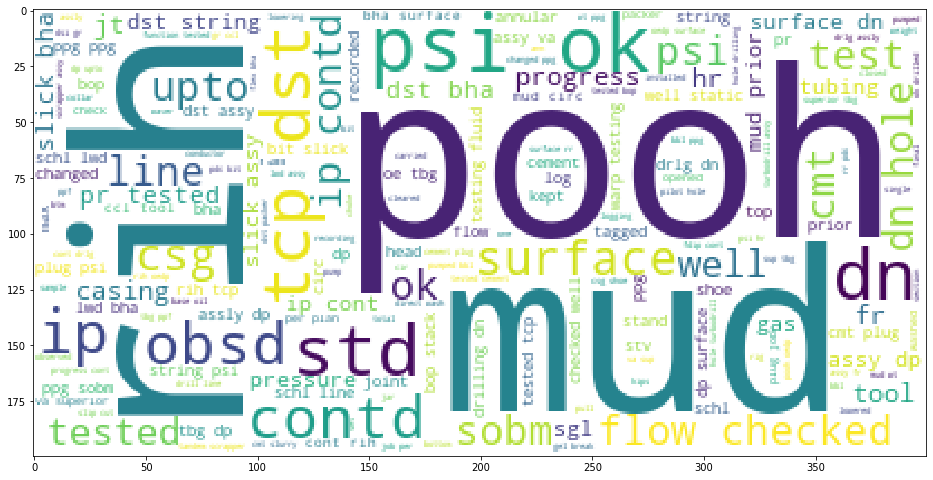

In [11]:
plt.figure(figsize=(16,20))
wf = WordCloud(background_color='white',max_words=1000,random_state=1).generate(text)
plt.imshow(wf)
plt.show()

In [12]:
wordnet = WordNetLemmatizer()
data['Sample_B']= data['Sample_B'].apply(lambda x:[wordnet.lemmatize(i,pos='v') for i in x])
data['Sample_B'].content = data['Sample_B'].apply(lambda x:[wordnet.lemmatize(i,pos='v') for i in x])

In [13]:
tst = ' '
for i in data['Sample_B']:
    for j in i:
        tst+=' '+j
op = re.sub(r'\b[a-z]\b\s+',"",text)
tst=op

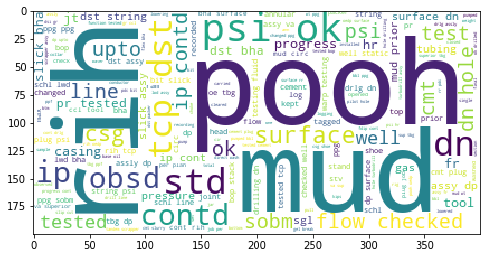

In [14]:
plt.figure(figsize=(8,10))
phy = WordCloud(background_color='white',max_words=1000,random_state=1).generate(tst)
plt.imshow(phy)
plt.show()

In [15]:
def identity_tokenizer(text):
  return text
vect = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x = vect.fit_transform(data['Sample_B'].values)

In [16]:
indices = np.argsort(vect.idf_)[::-1]
features = vect.get_feature_names()
top_n = 50
top_features = [features[i] for i in indices[:top_n]]
top_features

['zero',
 'fromsurface',
 'gauge',
 'gas',
 'gap',
 'gain',
 'furtherchemical',
 'function',
 'full',
 'ftht',
 'fthp',
 'ft',
 'frip',
 'hi',
 'fresh',
 'free',
 'fr',
 'fpoip',
 'fosv',
 'forward',
 'formation',
 'forjacking',
 'forbtm',
 'follow',
 'gd',
 'gel',
 'get',
 'go',
 'hermtest',
 'hermetically',
 'head',
 'hcr',
 'hard',
 'hap',
 'hanger',
 'handlingequipments',
 'handle',
 'hammer',
 'halliburton',
 'haliburton',
 'h',
 'gun',
 'gs',
 'greatship',
 'gradually',
 'grace',
 'gr',
 'gpmm',
 'gpm',
 'flush']

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=1, init='k-means++', max_iter=100, n_init=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=1, n_init=3, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
print("Top terms in cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::2]
terms = vect.get_feature_names()
for i in range(1):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :15]:
        print (' %s' % terms[ind],)

Top terms in cluster:
Cluster 0:
 able
 net
 mspotted
 mixer
 middle
 message
 mechanically
 mean
 loss
 lock
 livetcp
 leopard
 ob
 obsdsurface
 poohpooh
